MNIST data

### using PCA and kNN

In [2]:
import pandas as pd

df_train = pd.read_csv('../data/mnist_train.csv')
df_test = pd.read_csv('../data/mnist_test.csv')

df_train.shape, df_test.shape

/tmp/ipykernel_29255/1430871825.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


((60000, 785), (10000, 785))

왜 785냐면 1x1, 1x2 부터 픽셀값이 다 들어가기 때문에

In [3]:
import numpy as np

X_train = np.array(df_train.iloc[:, 1:]) # 1번 열은 label, 즉 타겟값
y_train = np.array(df_train['label'])

X_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_train['label'])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (60000,))

샘플로 랜덤 16개를 뽑아서 봐보자 !

In [4]:
import random

samples = random.choices(population=range(0, 60000), k=16)
samples

[31352,
 2889,
 31573,
 18264,
 38689,
 48786,
 57036,
 10712,
 28927,
 23407,
 17635,
 51572,
 42963,
 40710,
 24512,
 46526]

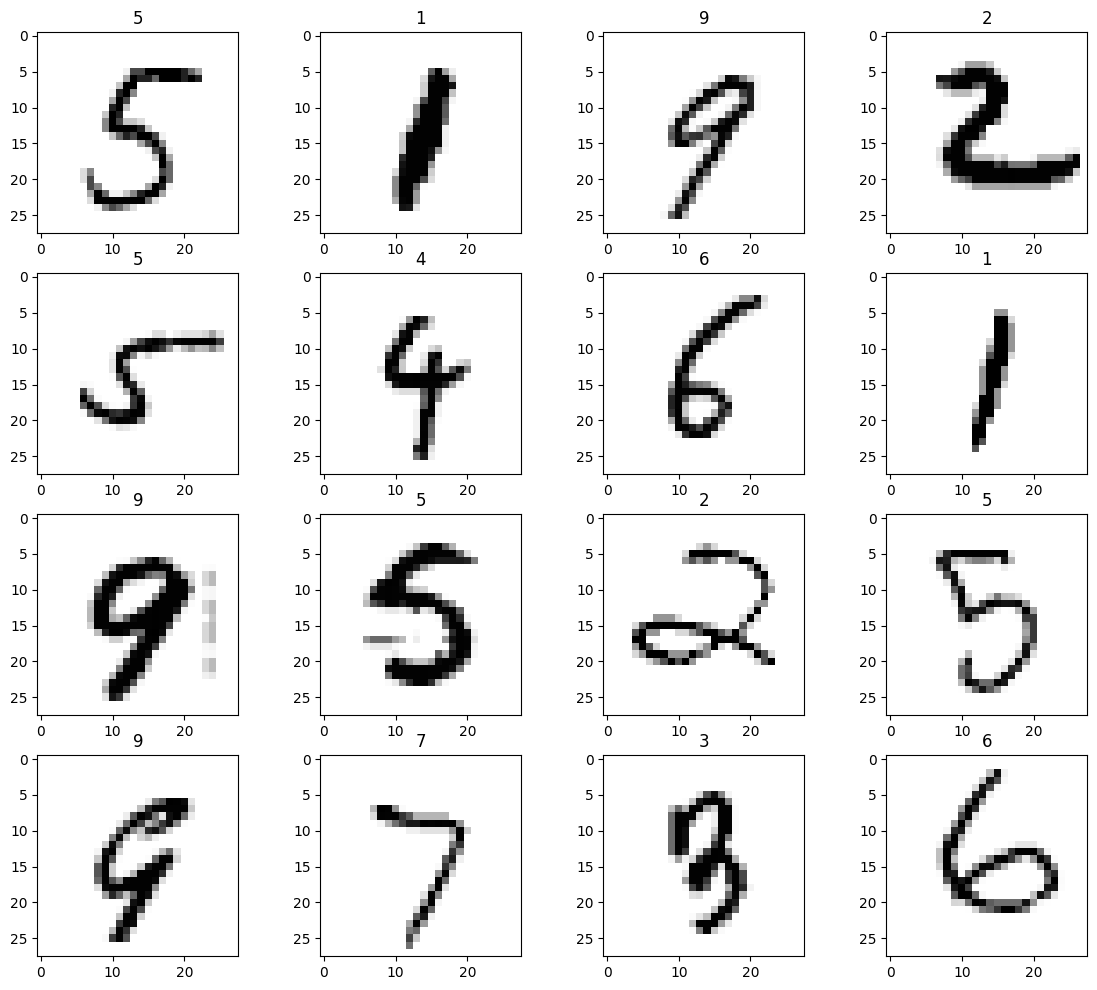

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_train[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title(y_train[n])
    
plt.show()

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()
clf = KNeighborsClassifier(n_neighbors= 5)
clf.fit(X_train, y_train)
print('Fit time : ', time.time() - start_time)

Fit time :  0.1666090488433838


In [7]:
from sklearn.metrics import accuracy_score

start_time = time.time()
pred = clf.predict(X_test)

print("Fit time : ", time.time() - start_time)
print(accuracy_score(y_test, pred))

Fit time :  26.734601736068726


ValueError: Found input variables with inconsistent numbers of samples: [60000, 10000]

### PCA로 차원을 줄여주자

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedGroupKFold

pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier()),
])

parameters = {
    'pca__n_components' : [2, 5, 10],
    'clf__n_neighbors' : [5, 10, 15]
}

kf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=13)
grid = GridSearchCV(pipe, parameters, cv=kf, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/addinedu/venv/opencv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/addinedu/venv/opencv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/addinedu/venv/opencv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
  File "/home/addinedu/venv/opencv/lib/python3.10/site-packages/sklearn/pipeline.py", line 993, in score
    Xt = transform.transform(Xt)
  File "/home/addinedu/venv/opencv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 273, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/addinedu/venv/opencv/lib/python3.10/site-packages/sklearn/decomposition/_base.py", l

GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=13, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [5, 10, 15],
                         'pca__n_components': [2, 5, 10]},
             verbose=1)

In [ ]:
print("Best Score : %0.3f" % grid.best_score_)
print("Best parameters set:")
best_parameters = grid.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best Score : nan
Best parameters set:


NameError: name 'sorteed' is not defined